# Part 2: Credit Risk Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree 
from sklearn.tree import plot_tree
from sklearn import preprocessing as sp
import matplotlib.pyplot as plt

# Loading data
data = np.genfromtxt('credit.txt', dtype=str, delimiter=None, skip_header=1)

In [2]:
columns = ['Name', 'Debt', 'Income', 'Married?', 'Owns_Property', 'Gender', 'Risk']
df = pd.DataFrame(data, columns=columns)
df

,Name,Debt,Income,Married?,Owns_Property,Gender,Risk
0,Tim,low,low,no,no,male,low
1,Joe,high,high,yes,yes,male,low
2,Sue,low,high,yes,no,female,low
3,John,medium,low,no,no,male,high
4,Mary,high,low,yes,no,female,high
5,Fred,low,low,yes,no,male,high
6,Pete,low,medium,no,yes,male,low
7,Jacob,high,medium,yes,yes,male,low
8,Sofia,medium,low,no,no,female,low


1) Dropping the 'Name' column as it's not needed for classification
2) Preprocess the data by converting categorical values to numerical values



In [3]:
df = df.drop(columns=['Name'])
le_features = sp.LabelEncoder()
le_risk = sp.LabelEncoder()

In [4]:
#Encode each categorical column
df['Risk'] = le_risk.fit_transform(df['Risk']) # Target variable
df['Debt'] = le_features.fit_transform(df['Debt'])
df['Income'] = le_features.fit_transform(df['Income'])
df['Married?'] = le_features.fit_transform(df['Married?'])
df['Owns_Property'] = le_features.fit_transform(df['Owns_Property'])
df['Gender'] = le_features.fit_transform(df['Gender'])

Features and target variable

In [5]:
X = df[['Debt', 'Income', 'Married?', 'Owns_Property', 'Gender']]
y = df['Risk']
print(df['Risk'].unique())
print(df['Risk'])


[1 0]
0    1
1    1
2    1
3    0
4    0
5    0
6    1
7    1
8    1
Name: Risk, dtype: int32


Initialize and train the decision tree classifier

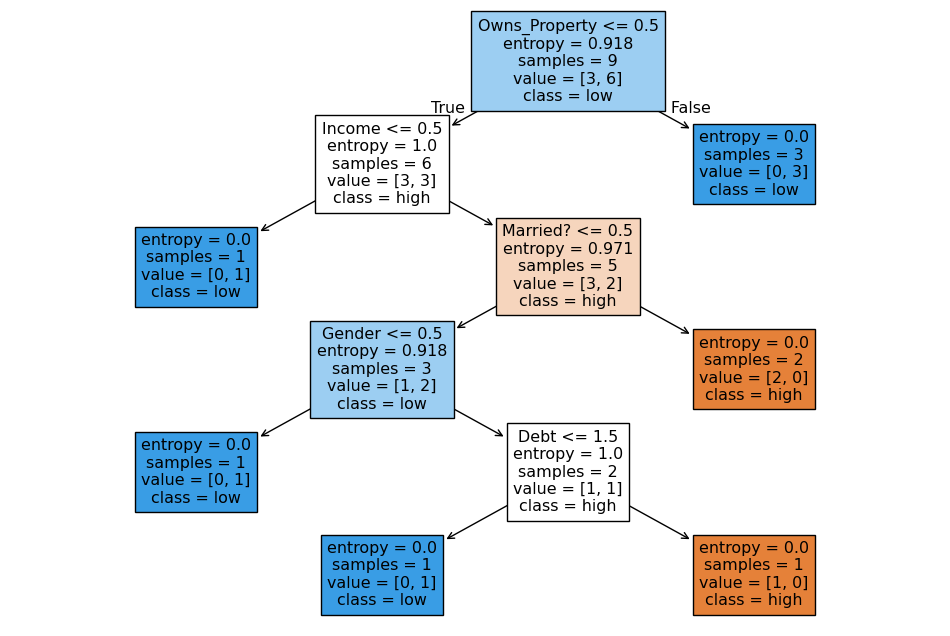

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['Debt', 'Income', 'Married?', 'Owns_Property', 'Gender'], class_names=le_risk.classes_, filled=True)
plt.show()

Defining Tom and Ana's data according to below table -
<br>
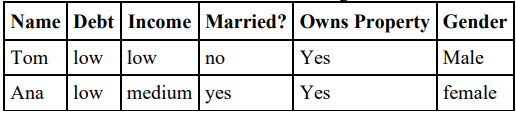

In [7]:
X_test = {
    'Debt': ['low', 'low'],
    'Income': ['low', 'medium'],
    'Married?': ['no', 'yes'],
    'Owns_Property': ['yes', 'yes'],
    'Gender': ['male', 'female']
}

X_test = pd.DataFrame(X_test)

#Encoding data
X_testX_test['Debt'] = le_features.transform(X_test['Debt'])
X_test['Income'] = le_features.transform(X_test['Income'])
X_test['Married?'] = le_features.transform(X_test['Married?'])
X_test['Owns_Property'] = le_features.transform(X_test['Owns_Property'])
X_test['Gender'] = le_features.transform(X_test['Gender'])

ValueError: y contains previously unseen labels: 'low'

Make predictions for Tom and Ana

In [ ]:
predictions = clf.predict(X_test)


predicted_risks = le_risk.inverse_transform(predictions)  

# Output the predictions
print(f"Tom's predicted credit risk: {predicted_risks[0]}")
print(f"Ana's predicted credit risk: {predicted_risks[1]}")

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=['Debt', 'Income', 'Married?', 'Owns_Property', 'Gender'], 
          class_names=le_risk.classes_, filled=True)
plt.show()